In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Load and read csv file
automobile_p = 'data/Automobile.csv'
import pandas as pd
import numpy as np
automobile = pd.read_csv(automobile_p, sep='#', decimal='.', header=None, names=['Symboling', 'NormalisedLosses', 'Make', 'FuelType', 'Aspiration', 'NumOfDoors', 'BodyStyle', 'DriveWheels', 'EngineLocation', 'WheelBase', 'Length', 'Width', 'Height', 'CurbWeight', 'EngineType', 'NumOfCylinders', 'EngineSize', 'FuelSystem', 'Bore', 'Stroke', 'CompressionRatio', 'Horsepower', 'PeakRPM', 'CityMPG', 'HighwayMPG', 'Price'])

#Check data types
print("Data Types:")
print(automobile.dtypes)
print("")

#Create copy of dataset for data preperation
prepare_automobile = automobile.copy()

#Remove all reduncant whitespace
for column in prepare_automobile:
    if prepare_automobile[column].dtype == np.object:
        prepare_automobile[column] = prepare_automobile[column].str.strip()

#Make all strings lowercase in each dtype == object columns
for column in prepare_automobile:
    if prepare_automobile[column].dtype == object:
        prepare_automobile[column] = prepare_automobile[column].str.lower()

        
#Check for any typo errors in every column and fix them
check = ['Symboling', 'Make', 'FuelType', 'Aspiration', 'NumOfDoors', 'BodyStyle', 'DriveWheels', 'EngineLocation', 'EngineType', 'NumOfCylinders', 'FuelSystem']
for attribute in check:
    print(attribute + " values:")
    print(prepare_automobile[attribute].value_counts())
    print("")
print("")

prepare_automobile['Make'].replace("vol00112ov", "volvo", inplace=True)
prepare_automobile['Aspiration'].replace("turrrrbo", "turbo", inplace=True)
prepare_automobile['NumOfDoors'].replace("fourr", "four", inplace=True)
prepare_automobile['Symboling'].replace(4, 3, inplace=True)

#replace all impossible values with NaN to be handled later but check values first if they are potential typos and fix them

print("Out of range NormalisedLosses values:")
for value in prepare_automobile['NormalisedLosses']:
    if value < 65 or value > 256:
        print(value)
print("")
for value in prepare_automobile['NormalisedLosses']:
    if value < 65 or value > 256:
        prepare_automobile.loc[prepare_automobile['NormalisedLosses'] == value, 'NormalisedLosses'] = np.nan

print("Out of range WheelBase values:")
for value in prepare_automobile['WheelBase']:
    if value < 86.6 or value > 120.9:
        print(value)
print("")

print("Out of range Length values:")
for value in prepare_automobile['Length']:
    if value < 141.1 or value > 208.1:
        print(value)
print("")

print("Out of range Width values:")
for value in prepare_automobile['Width']:
    if value < 60.3 or value > 72.3:
        print(value)
print("")

print("Out of range Height values:")
for value in prepare_automobile['Height']:
    if value < 47.8 or value > 59.8:
        print(value)
print("")

print("Out of range CurbWeight values:")
for value in prepare_automobile['CurbWeight']:
    if value < 1488 or value > 4066:
        print(value)
print("")

print("Out of range Bore values:")
for value in prepare_automobile['Bore']:
    if value < 2.54 or value > 3.94:
        print(value)
print("")

print("Out of range Stroke values:")
for value in prepare_automobile['Stroke']:
    if value < 2.07 or value > 4.17:
        print(value)
print("")

print("Out of range CompressionRatio values:")
for value in prepare_automobile['CompressionRatio']:
    if value < 7 or value > 23:
        print(value)
print("")

print("Out of range Horsepower values:")
for value in prepare_automobile['Horsepower']:
    if value < 48 or value > 288:
        print(value)
print("")

print("Out of range PeakRPM values:")
for value in prepare_automobile['PeakRPM']:
    if value < 4150 or value > 6600:
        print(value)
print("")

print("Out of range CityMPG values:")
for value in prepare_automobile['CityMPG']:
    if value < 13 or value > 49:
        print(value)
print("")

print("Out of range HighwayMPG values:")
for value in prepare_automobile['HighwayMPG']:
    if value < 16 or value > 54:
        print(value)
print("")

print("Out of range Price values:")
for value in prepare_automobile['Price']:
    if value < 5118 or value > 45400:
        print(value)
print("")
for value in prepare_automobile['Price']:
    if value < 5118 or value > 45400:
        prepare_automobile.loc[prepare_automobile['Price'] == value, 'Price'] = np.nan
        

#Go through all numerical data and impute data with NaN using median if the amount of missing values in column is "low"
import matplotlib.pyplot as plt

#Create array of all attributes to check
check = ['NormalisedLosses', 'WheelBase', 'Length', 'Width', 'Height', 'CurbWeight', 'Bore', 'Stroke', 'CompressionRatio', 'Horsepower', 'PeakRPM', 'CityMPG', 'HighwayMPG', 'Price']
#Check and print all attributes
for attribute in check:
    i=0;
    for value in prepare_automobile[attribute]:
        if pd.isnull(value):
            i = i+1;
    print(attribute + " amount of NaN value = " + str(i));
    print("")
print("")

#Fix all NaN values if below 21 values missing
prepare_automobile['Bore'].fillna(prepare_automobile['Bore'].median(axis=0),inplace=True)
prepare_automobile['Stroke'].fillna(prepare_automobile['Stroke'].median(axis=0),inplace=True)
prepare_automobile['Horsepower'].fillna(prepare_automobile['Horsepower'].median(axis=0),inplace=True)
prepare_automobile['PeakRPM'].fillna(prepare_automobile['PeakRPM'].median(axis=0),inplace=True)
prepare_automobile['Price'].fillna(prepare_automobile['Price'].median(axis=0),inplace=True)

#Find relations between data and imputations and impute an estimated and random value
prepare_automobile.plot(kind='scatter', x=0, y=1)
#As graphs shows a relationship I will group all observations with the same symboling value, calculate the normalisaiton losses mean of the group and impute this mean value into the observations with the same symboling value
for x in range(7):
    prepare_automobile.loc[(pd.isnull(prepare_automobile.NormalisedLosses)) & (prepare_automobile.Symboling == x-3), 'NormalisedLosses'] = prepare_automobile['NormalisedLosses'][prepare_automobile.Symboling == x-3].mean(axis=0)

#Go through all nominal data for NaN values and fix them
#Create array of all attributes to check
check = ['Symboling', 'Make', 'FuelType', 'Aspiration', 'NumOfDoors', 'BodyStyle', 'DriveWheels', 'EngineLocation', 'EngineType', 'NumOfCylinders', 'FuelSystem']
#Prints amount of NaN values in each attribute
for attribute in check:
    i=0;
    for value in prepare_automobile[attribute]:
        if pd.isnull(value):
            i = i+1;
    print(attribute + " amount of NaN value = " + str(i));
    print("")
print("")
#Fix NaN values
prepare_automobile['Price'].fillna("four",inplace=True)

Data Types:
Symboling             int64
NormalisedLosses    float64
Make                 object
FuelType             object
Aspiration           object
NumOfDoors           object
BodyStyle            object
DriveWheels          object
EngineLocation       object
WheelBase           float64
Length              float64
Width               float64
Height              float64
CurbWeight            int64
EngineType           object
NumOfCylinders       object
EngineSize            int64
FuelSystem           object
Bore                float64
Stroke              float64
CompressionRatio    float64
Horsepower          float64
PeakRPM             float64
CityMPG               int64
HighwayMPG            int64
Price               float64
dtype: object

Symboling values:
 0    67
 1    54
-1    52
 2    32
 3    27
 4     3
-2     3
Name: Symboling, dtype: int64

Make values:
volvo            41
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13


Text(0.5,0,'Prices ($)')

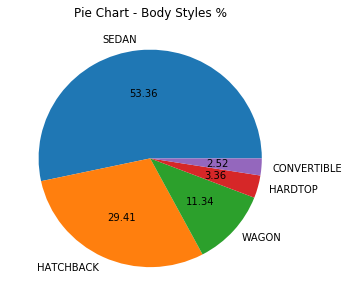

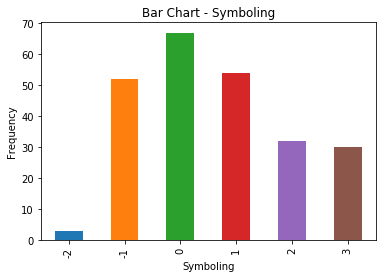

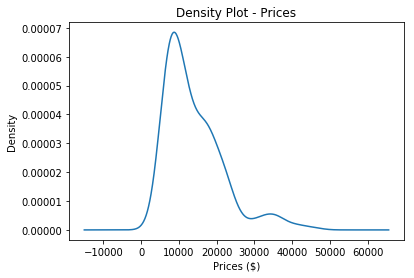

In [2]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line

#Turn all data values to upper case to easily read them in the visualisation
for column in prepare_automobile:
    if prepare_automobile[column].dtype == object:
        prepare_automobile[column] = prepare_automobile[column].str.upper()
        
#Create pie chart for nominal value of body style
plt.figure(1)
prepare_automobile['BodyStyle'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5))
plt.ylabel('')
plt.title('Pie Chart - Body Styles %')

#Create bar chart for ordinal value of symboling
plt.figure(2)
prepare_automobile['Symboling'].value_counts().sort_index().plot(kind='bar')
plt.title("Bar Chart - Symboling")
plt.ylabel("Frequency")
plt.xlabel("Symboling")

#Create density plot for numerical value of price
plt.figure(3)
prepare_automobile['Price'].plot(kind='density')
plt.title("Density Plot - Prices")
plt.xlabel("Prices ($)")


Text(0,0.5,'Highway MPG')

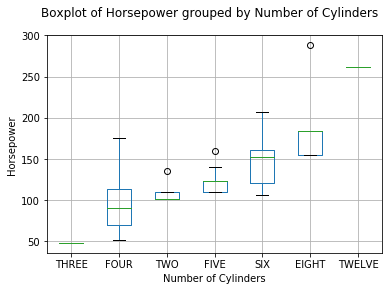

<Figure size 432x288 with 0 Axes>

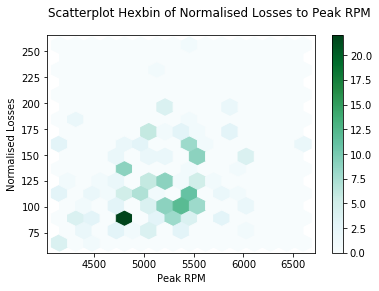

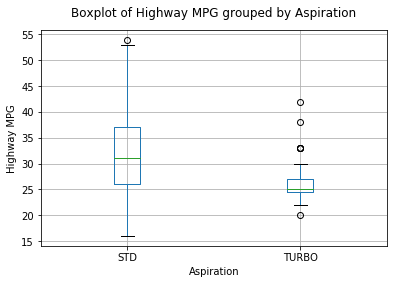

In [3]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line

#Create and show first visualisation
#Duncan Parkes. (2016). Sort Pandas Boxplots. Available: https://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/. Last accessed 06/04/2019.
tempDataFrame = pd.DataFrame({col:vals['Horsepower'] for col, vals in prepare_automobile.groupby(by=['NumOfCylinders'])})
sortedMedian = tempDataFrame.median().sort_values()
tempDataFrame[sortedMedian.index].boxplot()

plt.figure(1)
plt.suptitle("Boxplot of Horsepower grouped by Number of Cylinders")
plt.title("")
plt.ylabel("Horsepower")
plt.xlabel("Number of Cylinders")

#Create and show second visualisation
plt.figure(2)
prepare_automobile.plot(kind='hexbin', x=22,y=1,gridsize=15, sharex=False)
plt.suptitle("Scatterplot Hexbin of Normalised Losses to Peak RPM")
plt.title("")
plt.ylabel("Normalised Losses")
plt.xlabel("Peak RPM")

#Create and show third visualisation
plt.figure(3)
prepare_automobile.dropna().boxplot(column='HighwayMPG',by='Aspiration')
plt.suptitle("Boxplot of Highway MPG grouped by Aspiration")
plt.title("")
plt.ylabel("Highway MPG")

In [ ]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

from pandas.plotting import scatter_matrix
scatter_matrix(prepare_automobile, alpha=0.2, figsize=(25,25), diagonal='hist')
plt.show()